<a href="https://colab.research.google.com/github/ShuaimingJing/CV_individual_proect1/blob/main/faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install pycocotools


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-sarrgdhu
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-sarrgdhu
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.0 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [1]:
import matplotlib.pyplot as plt
import os
import torch
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.logger import setup_logger
from detectron2.utils.events import EventStorage
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from google.colab import drive
import matplotlib.pyplot as plt
import json
import random
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from detectron2.data import DatasetCatalog, MetadataCatalog
import time

drive.mount('/content/drive')


Mounted at /content/drive


# Load data

In [3]:
register_coco_instances("train_coco", {}, "/content/drive/My Drive/Individual_project/train_coco.json", "/content/drive/My Drive/Individual_project/train_images")
register_coco_instances("val_coco", {}, "/content/drive/My Drive/Individual_project/val_coco.json", "/content/drive/My Drive/Individual_project/val_images")
# Check if the dataset is registered correctly
dataset_dicts = DatasetCatalog.get("train_coco")
print(f"Number of train images: {len(dataset_dicts)}")
# Check if the dataset is registered correctly
dataset_dicts = DatasetCatalog.get("val_coco")
print(f"Number of val images: {len(dataset_dicts)}")


[10/20 18:40:28 d2.data.datasets.coco]: Loaded 289 images in COCO format from /content/drive/My Drive/Individual_project/train_coco.json
Number of train images: 289
[10/20 18:40:28 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
Number of val images: 73


[10/20 17:17:50 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


Iteration 0/400, Loss: 3.1236531734466553
[10/20 17:18:03 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:18:04 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:18:04 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:18:04 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:18:04 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:18:04 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:18:04 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:18:04 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:18:04 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0353 s/iter. Eval: 0.0005 s/iter. Total: 0.0369 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:18:21 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:18:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:18:21 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:18:21 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:18:21 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:18:21 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:18:21 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:18:22 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0029 s/iter. Inference: 0.0309 s/iter. Eval: 0.0004 s/iter. Total: 0.0343 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:18:39 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:18:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:18:39 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:18:39 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:18:39 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:18:39 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:18:39 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:18:40 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0297 s/iter. Eval: 0.0004 s/iter. Total: 0.0311 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:18:56 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:18:56 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:18:56 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:18:56 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:18:56 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:18:56 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:18:56 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:18:57 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0027 s/iter. Inference: 0.0318 s/iter. Eval: 0.0005 s/iter. Total: 0.0350 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:19:14 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:19:14 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:19:14 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:19:14 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:19:14 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:19:14 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:19:14 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:19:15 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0332 s/iter. Eval: 0.0005 s/iter. Total: 0.0348 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:19:31 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:19:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:19:31 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:19:31 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:19:31 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:19:31 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:19:31 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:19:32 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0031 s/iter. Inference: 0.0338 s/iter. Eval: 0.0005 s/iter. Total: 0.0374 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:19:49 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:19:49 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:19:49 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:19:49 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:19:49 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:19:49 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:19:49 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:19:50 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0323 s/iter. Eval: 0.0004 s/iter. Total: 0.0340 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:20:06 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:20:06 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:20:06 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:20:06 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:20:06 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:20:06 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:20:06 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:20:07 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0029 s/iter. Inference: 0.0308 s/iter. Eval: 0.0005 s/iter. Total: 0.0342 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:20:24 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:20:24 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:20:24 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:20:24 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:20:24 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:20:24 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:20:24 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:20:25 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0301 s/iter. Eval: 0.0005 s/iter. Total: 0.0318 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:20:41 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:20:41 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:20:41 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:20:41 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:20:41 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:20:41 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:20:41 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:20:42 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0009 s/iter. Inference: 0.0298 s/iter. Eval: 0.0005 s/iter. Total: 0.0312 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:20:59 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:20:59 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:20:59 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:20:59 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:20:59 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:20:59 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:20:59 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:21:00 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0023 s/iter. Inference: 0.0325 s/iter. Eval: 0.0005 s/iter. Total: 0.0352 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:21:16 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:21:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:21:17 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:21:17 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:21:17 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:21:17 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:21:17 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:21:17 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0309 s/iter. Eval: 0.0004 s/iter. Total: 0.0323 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:21:34 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:21:34 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:21:34 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:21:34 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:21:34 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:21:34 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:21:34 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:21:35 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0337 s/iter. Eval: 0.0005 s/iter. Total: 0.0355 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:21:52 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:21:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:21:52 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:21:52 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:21:52 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:21:52 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:21:52 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:21:52 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0028 s/iter. Inference: 0.0294 s/iter. Eval: 0.0004 s/iter. Total: 0.0326 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:22:10 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:22:10 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:22:10 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:22:10 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:22:10 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:22:10 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:22:10 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:22:10 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0306 s/iter. Eval: 0.0004 s/iter. Total: 0.0321 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:22:27 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:22:27 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:22:27 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:22:27 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:22:27 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:22:27 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:22:27 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:22:27 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0310 s/iter. Eval: 0.0004 s/iter. Total: 0.0325 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:22:44 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:22:44 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:22:44 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:22:44 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:22:44 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:22:44 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:22:45 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:22:45 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0029 s/iter. Inference: 0.0294 s/iter. Eval: 0.0004 s/iter. Total: 0.0327 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:23:02 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:23:02 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:23:02 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:23:02 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:23:02 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:23:02 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:23:02 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:23:02 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0019 s/iter. Inference: 0.0322 s/iter. Eval: 0.0004 s/iter. Total: 0.0345 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:23:20 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:23:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:23:20 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:23:20 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:23:20 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:23:20 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:23:20 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:23:21 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0026 s/iter. Inference: 0.0302 s/iter. Eval: 0.0004 s/iter. Total: 0.0332 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:23:37 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:23:37 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:23:37 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:23:37 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:23:37 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:23:37 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:23:37 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:23:38 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0344 s/iter. Eval: 0.0005 s/iter. Total: 0.0361 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:23:55 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:23:55 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:23:55 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:23:55 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:23:55 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:23:55 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:23:55 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:23:55 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0024 s/iter. Inference: 0.0314 s/iter. Eval: 0.0004 s/iter. Total: 0.0343 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:24:12 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:24:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:24:12 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:24:12 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:24:12 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:24:12 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:24:12 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:24:13 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0025 s/iter. Inference: 0.0304 s/iter. Eval: 0.0004 s/iter. Total: 0.0333 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:24:30 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:24:30 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:24:30 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:24:30 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:24:30 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:24:30 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:24:30 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:24:31 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0318 s/iter. Eval: 0.0004 s/iter. Total: 0.0333 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:24:47 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:24:48 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:24:48 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:24:48 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:24:48 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:24:48 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:24:48 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:24:48 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0009 s/iter. Inference: 0.0301 s/iter. Eval: 0.0004 s/iter. Total: 0.0314 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:25:05 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:25:05 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:25:05 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:25:05 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:25:05 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:25:05 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:25:05 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:25:06 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0298 s/iter. Eval: 0.0005 s/iter. Total: 0.0314 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:25:23 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:25:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:25:23 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:25:23 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:25:23 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:25:23 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:25:23 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:25:23 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0009 s/iter. Inference: 0.0294 s/iter. Eval: 0.0004 s/iter. Total: 0.0307 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:25:40 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:25:40 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:25:40 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:25:40 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:25:40 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:25:40 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:25:40 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:25:41 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0300 s/iter. Eval: 0.0004 s/iter. Total: 0.0315 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:25:57 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:25:58 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:25:58 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:25:58 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:25:58 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:25:58 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:25:58 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:25:58 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0027 s/iter. Inference: 0.0299 s/iter. Eval: 0.0004 s/iter. Total: 0.0331 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:26:15 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:26:15 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:26:15 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:26:15 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:26:15 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:26:15 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:26:15 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:26:16 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0026 s/iter. Inference: 0.0319 s/iter. Eval: 0.0005 s/iter. Total: 0.0350 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:26:32 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:26:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:26:32 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:26:32 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:26:32 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:26:32 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:26:32 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:26:33 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0305 s/iter. Eval: 0.0004 s/iter. Total: 0.0319 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:26:50 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:26:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:26:50 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:26:50 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:26:50 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:26:50 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:26:50 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:26:51 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0307 s/iter. Eval: 0.0004 s/iter. Total: 0.0322 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:27:08 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:27:08 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:27:08 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:27:08 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:27:08 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:27:08 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:27:08 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:27:08 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0020 s/iter. Inference: 0.0313 s/iter. Eval: 0.0004 s/iter. Total: 0.0337 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:27:25 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:27:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:27:26 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:27:26 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:27:26 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:27:26 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:27:26 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:27:26 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0022 s/iter. Inference: 0.0303 s/iter. Eval: 0.0004 s/iter. Total: 0.0330 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:27:43 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:27:43 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:27:43 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:27:43 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:27:43 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:27:43 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:27:43 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:27:44 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0009 s/iter. Inference: 0.0301 s/iter. Eval: 0.0004 s/iter. Total: 0.0313 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:28:01 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:28:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:28:01 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:28:01 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:28:01 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:28:01 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:28:01 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:28:01 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0302 s/iter. Eval: 0.0005 s/iter. Total: 0.0316 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:28:18 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:28:18 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:28:18 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:28:18 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:28:18 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:28:18 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:28:18 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:28:19 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0009 s/iter. Inference: 0.0310 s/iter. Eval: 0.0004 s/iter. Total: 0.0323 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:28:36 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:28:36 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:28:36 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:28:36 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:28:36 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:28:36 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:28:36 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:28:37 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0028 s/iter. Inference: 0.0300 s/iter. Eval: 0.0004 s/iter. Total: 0.0333 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:28:53 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:28:53 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:28:53 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:28:53 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:28:53 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:28:53 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:28:53 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:28:54 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0296 s/iter. Eval: 0.0004 s/iter. Total: 0.0311 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:29:11 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:29:11 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:29:11 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:29:11 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:29:11 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:29:11 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:29:11 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:29:12 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0028 s/iter. Inference: 0.0297 s/iter. Eval: 0.0004 s/iter. Total: 0.0329 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 17:29:29 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 17:29:29 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 17:29:29 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 17:29:29 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 17:29:29 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 17:29:29 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 17:29:29 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 17:29:29 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0022 s/iter. Inference: 0.0310 s/iter. Eval: 0.0005 s/iter. Total: 0.0336 s/i

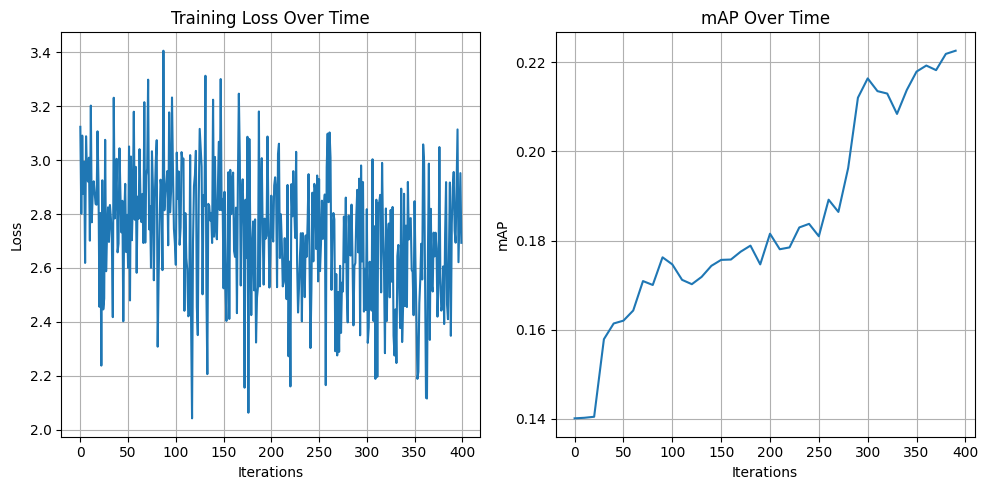

Training and evaluation completed!


In [14]:
setup_logger()

# Setup Detectron2 configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_coco",)
cfg.DATASETS.TEST = ("val_coco",)  # Add a validation set
cfg.OUTPUT_DIR = "/content/drive/My Drive/Individual_project/frcnn"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 400
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 4
cfg.TEST.EVAL_PERIOD = 10  # Evaluate every 100 iteration

class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

trainer = Trainer(cfg)
trainer.resume_or_load(resume=False)

loss_history = []
mAP_values = []
start_time = time.time()

with EventStorage(0) as storage:
    for iteration in range(cfg.SOLVER.MAX_ITER):
        # Training step
        data = next(iter(trainer.data_loader))
        loss_dict = trainer.model(data)
        losses = sum(loss for loss in loss_dict.values())
        trainer.optimizer.zero_grad()
        losses.backward()
        trainer.optimizer.step()

        storage.put_scalar("total_loss", losses.item())
        loss_history.append(losses.item())

        # Evaluation step
        if (iteration + 1) % cfg.TEST.EVAL_PERIOD == 0:
            # Set the model to evaluation mode
            trainer.model.eval()

            # Create a predictor
            predictor = DefaultPredictor(cfg)

            # Run inference on the validation set
            val_loader = build_detection_test_loader(cfg, cfg.DATASETS.TEST[0])
            evaluator = COCOEvaluator(cfg.DATASETS.TEST[0], cfg, False, output_dir=cfg.OUTPUT_DIR)
            results = inference_on_dataset(trainer.model, val_loader, evaluator)

            # Extract mAP
            mAP = results['bbox']['AP']
            mAP_values.append(mAP)
            print(f"Iteration {iteration + 1}, mAP: {mAP}")

            # Set the model back to training mode
            trainer.model.train()

        if iteration % 100 == 0:
            print(f"Iteration {iteration}/{cfg.SOLVER.MAX_ITER}, Loss: {losses.item()}")

# Stop the timer and calculate total time
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss Over Time")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)

# Plot mAP
plt.subplot(1, 2, 2)
plt.plot(range(0, cfg.SOLVER.MAX_ITER, cfg.TEST.EVAL_PERIOD), mAP_values)
plt.title("mAP Over Time")
plt.xlabel("Iterations")
plt.ylabel("mAP")
plt.grid(True)

plt.tight_layout()
# plt.savefig(os.path.join(cfg.OUTPUT_DIR, "training_metrics.png"))
plt.show()

print("Training and evaluation completed!")

[10/20 18:40:32 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:01, 131MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Iteration 0/430, Loss: 3.1169919967651367
[10/20 18:40:52 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:40:52 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:40:52 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|  keyboard  | 18           |   mouse    | 13           |  utensils  | 57           |
|   laptop   | 21           |            |              |            |              |
|   total    | 109          |            |              |            |              |
[10/20 18:40:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:40:52 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:40:52 d2.data.common]: Serializing 73 elements 

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:41:15 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:41:15 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:41:15 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:41:15 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:41:15 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:41:15 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:41:15 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:41:15 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0310 s/iter. Eval: 0.0004 s/iter. Total: 0.0325 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:41:32 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:41:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:41:32 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:41:32 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:41:32 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:41:32 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:41:32 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:41:33 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0294 s/iter. Eval: 0.0004 s/iter. Total: 0.0309 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:41:51 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:41:51 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:41:51 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:41:51 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:41:51 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:41:51 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:41:51 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:41:51 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0295 s/iter. Eval: 0.0004 s/iter. Total: 0.0310 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:42:09 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:42:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:42:09 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:42:09 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:42:09 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:42:09 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:42:09 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:42:09 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0033 s/iter. Inference: 0.0299 s/iter. Eval: 0.0004 s/iter. Total: 0.0337 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:42:26 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:42:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:42:26 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:42:26 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:42:26 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:42:26 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:42:26 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:42:27 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0294 s/iter. Eval: 0.0004 s/iter. Total: 0.0309 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:42:45 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:42:45 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:42:45 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:42:45 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:42:45 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:42:45 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:42:45 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:42:45 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0300 s/iter. Eval: 0.0005 s/iter. Total: 0.0318 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:43:02 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:43:02 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:43:02 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:43:02 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:43:02 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:43:02 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:43:02 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:43:03 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0293 s/iter. Eval: 0.0004 s/iter. Total: 0.0309 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:43:20 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:43:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:43:20 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:43:20 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:43:20 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:43:20 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:43:20 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:43:21 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0297 s/iter. Eval: 0.0004 s/iter. Total: 0.0311 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:43:38 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:43:38 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:43:38 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:43:38 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:43:38 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:43:38 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:43:38 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:43:39 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0286 s/iter. Eval: 0.0004 s/iter. Total: 0.0300 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:43:56 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:43:56 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:43:56 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:43:56 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:43:56 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:43:56 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:43:56 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:43:56 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0031 s/iter. Inference: 0.0303 s/iter. Eval: 0.0004 s/iter. Total: 0.0338 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:44:14 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:44:14 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:44:14 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:44:14 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:44:14 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:44:14 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:44:14 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:44:14 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0304 s/iter. Eval: 0.0004 s/iter. Total: 0.0321 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:44:32 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:44:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:44:32 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:44:32 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:44:32 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:44:32 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:44:32 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:44:32 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0032 s/iter. Inference: 0.0294 s/iter. Eval: 0.0006 s/iter. Total: 0.0332 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:44:50 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:44:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:44:50 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:44:50 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:44:50 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:44:50 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:44:50 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:44:50 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0295 s/iter. Eval: 0.0004 s/iter. Total: 0.0313 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:45:08 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:45:08 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:45:08 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:45:08 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:45:08 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:45:08 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:45:08 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:45:08 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0301 s/iter. Eval: 0.0004 s/iter. Total: 0.0316 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:45:26 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:45:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:45:26 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:45:26 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:45:26 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:45:26 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:45:26 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:45:26 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0324 s/iter. Eval: 0.0004 s/iter. Total: 0.0340 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:45:44 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:45:44 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:45:44 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:45:44 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:45:44 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:45:44 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:45:44 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:45:44 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0026 s/iter. Inference: 0.0306 s/iter. Eval: 0.0004 s/iter. Total: 0.0336 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:46:02 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:46:02 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:46:02 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:46:02 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:46:02 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:46:02 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:46:02 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:46:02 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0421 s/iter. Eval: 0.0007 s/iter. Total: 0.0440 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:46:20 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:46:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:46:20 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:46:20 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:46:20 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:46:20 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:46:20 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:46:21 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0291 s/iter. Eval: 0.0004 s/iter. Total: 0.0305 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:46:38 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:46:38 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:46:38 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:46:38 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:46:38 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:46:38 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:46:38 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:46:38 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0014 s/iter. Inference: 0.0318 s/iter. Eval: 0.0004 s/iter. Total: 0.0337 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:46:56 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:46:56 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:46:56 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:46:56 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:46:56 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:46:56 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:46:56 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:46:56 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0290 s/iter. Eval: 0.0004 s/iter. Total: 0.0306 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:47:14 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:47:14 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:47:14 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:47:14 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:47:14 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:47:14 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:47:14 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:47:14 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0321 s/iter. Eval: 0.0004 s/iter. Total: 0.0338 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:47:32 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:47:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:47:32 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:47:32 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:47:32 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:47:32 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:47:32 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:47:33 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0327 s/iter. Eval: 0.0004 s/iter. Total: 0.0342 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:47:50 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:47:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:47:50 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:47:50 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:47:50 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:47:50 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:47:50 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:47:51 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0313 s/iter. Eval: 0.0004 s/iter. Total: 0.0328 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:48:09 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:48:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:48:09 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:48:09 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:48:09 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:48:09 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:48:09 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:48:09 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0029 s/iter. Inference: 0.0300 s/iter. Eval: 0.0004 s/iter. Total: 0.0333 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:48:27 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:48:27 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:48:27 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:48:27 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:48:27 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:48:27 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:48:27 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:48:27 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0031 s/iter. Inference: 0.0296 s/iter. Eval: 0.0004 s/iter. Total: 0.0331 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:48:45 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:48:45 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:48:45 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:48:45 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:48:45 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:48:45 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:48:45 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:48:45 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0286 s/iter. Eval: 0.0004 s/iter. Total: 0.0301 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:49:03 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:49:03 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:49:03 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:49:03 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:49:03 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:49:03 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:49:03 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:49:03 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0314 s/iter. Eval: 0.0005 s/iter. Total: 0.0328 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:49:21 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:49:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:49:21 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:49:21 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:49:21 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:49:21 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:49:21 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:49:21 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0031 s/iter. Inference: 0.0299 s/iter. Eval: 0.0004 s/iter. Total: 0.0334 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:49:39 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:49:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:49:39 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:49:39 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:49:39 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:49:39 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:49:39 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:49:39 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0302 s/iter. Eval: 0.0004 s/iter. Total: 0.0317 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:49:57 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:49:57 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:49:57 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:49:57 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:49:57 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:49:57 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:49:57 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:49:57 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0294 s/iter. Eval: 0.0004 s/iter. Total: 0.0310 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:50:15 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:50:15 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:50:15 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:50:15 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:50:15 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:50:15 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:50:15 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:50:15 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0029 s/iter. Inference: 0.0305 s/iter. Eval: 0.0004 s/iter. Total: 0.0338 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:50:33 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:50:33 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:50:33 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:50:33 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:50:33 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:50:33 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:50:33 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:50:34 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0322 s/iter. Eval: 0.0004 s/iter. Total: 0.0337 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:50:51 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:50:51 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:50:51 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:50:51 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:50:51 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:50:51 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:50:51 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:50:52 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0014 s/iter. Inference: 0.0291 s/iter. Eval: 0.0004 s/iter. Total: 0.0309 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:51:09 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:51:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:51:09 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:51:09 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:51:09 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:51:09 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:51:09 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:51:10 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0414 s/iter. Eval: 0.0005 s/iter. Total: 0.0431 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:51:27 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:51:27 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:51:27 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:51:27 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:51:27 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:51:27 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:51:27 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:51:28 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0303 s/iter. Eval: 0.0004 s/iter. Total: 0.0317 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:51:45 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:51:45 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:51:45 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:51:45 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:51:45 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:51:45 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:51:45 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:51:46 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0294 s/iter. Eval: 0.0004 s/iter. Total: 0.0311 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:52:03 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:52:03 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:52:03 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:52:03 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:52:03 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:52:03 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:52:03 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:52:04 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0034 s/iter. Inference: 0.0288 s/iter. Eval: 0.0004 s/iter. Total: 0.0326 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:52:21 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:52:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:52:21 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:52:21 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:52:21 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:52:21 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:52:21 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:52:22 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0300 s/iter. Eval: 0.0005 s/iter. Total: 0.0316 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:52:40 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:52:40 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:52:40 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:52:40 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:52:40 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:52:40 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:52:40 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:52:40 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0307 s/iter. Eval: 0.0004 s/iter. Total: 0.0322 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:52:58 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:52:58 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:52:58 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:52:58 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:52:58 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:52:58 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:52:58 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:52:58 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0328 s/iter. Eval: 0.0004 s/iter. Total: 0.0344 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:53:16 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:53:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:53:16 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:53:16 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:53:16 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:53:16 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:53:16 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:53:16 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0308 s/iter. Eval: 0.0004 s/iter. Total: 0.0324 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:53:34 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:53:34 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:53:34 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:53:34 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:53:34 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:53:34 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:53:34 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:53:34 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0290 s/iter. Eval: 0.0004 s/iter. Total: 0.0305 s/i

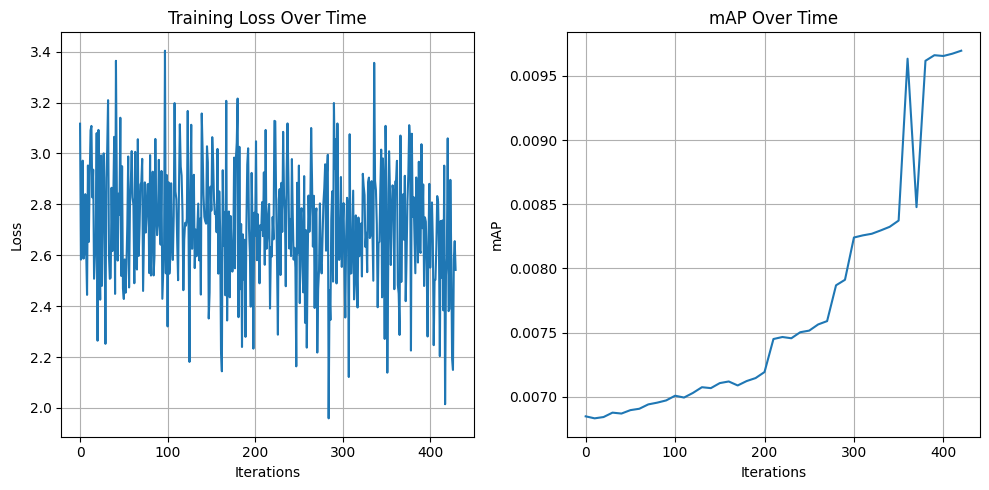

Training and evaluation completed!


In [4]:
setup_logger()

# Setup Detectron2 configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_coco",)
cfg.DATASETS.TEST = ("val_coco",)  # Add a validation set
cfg.OUTPUT_DIR = "/content/drive/My Drive/Individual_project/frcnn"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 430
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 4
cfg.TEST.EVAL_PERIOD = 10

class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

trainer = Trainer(cfg)
trainer.resume_or_load(resume=False)

loss_history = []
mAP_values = []
start_time = time.time()

with EventStorage(0) as storage:
    for iteration in range(cfg.SOLVER.MAX_ITER):
        # Training step
        data = next(iter(trainer.data_loader))
        loss_dict = trainer.model(data)
        losses = sum(loss for loss in loss_dict.values())
        trainer.optimizer.zero_grad()
        losses.backward()
        trainer.optimizer.step()

        storage.put_scalar("total_loss", losses.item())
        loss_history.append(losses.item())

        # Evaluation step
        if (iteration + 1) % cfg.TEST.EVAL_PERIOD == 0:
            # Set the model to evaluation mode
            trainer.model.eval()

            # Create a predictor
            predictor = DefaultPredictor(cfg)

            # Run inference on the validation set
            val_loader = build_detection_test_loader(cfg, cfg.DATASETS.TEST[0])
            evaluator = COCOEvaluator(cfg.DATASETS.TEST[0], cfg, False, output_dir=cfg.OUTPUT_DIR)
            results = inference_on_dataset(trainer.model, val_loader, evaluator)

            # Extract mAP
            mAP = results['bbox']['AP']
            mAP_values.append(mAP)
            print(f"Iteration {iteration + 1}, mAP: {mAP}")

            # Set the model back to training mode
            trainer.model.train()

        if iteration % 100 == 0:
            print(f"Iteration {iteration}/{cfg.SOLVER.MAX_ITER}, Loss: {losses.item()}")

# Stop the timer and calculate total time
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss Over Time")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)

# Plot mAP
plt.subplot(1, 2, 2)
plt.plot(range(0, cfg.SOLVER.MAX_ITER, cfg.TEST.EVAL_PERIOD), mAP_values)
plt.title("mAP Over Time")
plt.xlabel("Iterations")
plt.ylabel("mAP")
plt.grid(True)

plt.tight_layout()
# plt.savefig(os.path.join(cfg.OUTPUT_DIR, "training_metrics.png"))
plt.show()

print("Training and evaluation completed!")

## Without negative examples

In [5]:
register_coco_instances("train", {}, "/content/drive/My Drive/Individual_project/train_coco_wo_bg.json", "/content/drive/My Drive/Individual_project/train_img_wo_bc")
register_coco_instances("val", {}, "/content/drive/My Drive/Individual_project/val_coco_wo_bg.json", "/content/drive/My Drive/Individual_project/val_img_wo_bc")
# Check if the dataset is registered correctly
dataset_dicts = DatasetCatalog.get("train_coco")
print(f"Number of train images: {len(dataset_dicts)}")
# Check if the dataset is registered correctly
dataset_dicts = DatasetCatalog.get("val_coco")
print(f"Number of val images: {len(dataset_dicts)}")


[10/20 18:53:39 d2.data.datasets.coco]: Loaded 289 images in COCO format from /content/drive/My Drive/Individual_project/train_coco.json
Number of train images: 289
[10/20 18:53:40 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
Number of val images: 73


[10/20 18:53:40 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


Iteration 0/400, Loss: 2.948721408843994
[10/20 18:53:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:53:50 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:53:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:53:50 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:53:50 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:53:50 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:53:50 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:53:50 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:53:51 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0325 s/iter. Eval: 0.0005 s/iter. Total: 0.0342 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:54:04 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:54:04 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:54:04 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:54:04 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:54:04 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:54:04 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:54:04 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:54:05 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0030 s/iter. Inference: 0.0304 s/iter. Eval: 0.0004 s/iter. Total: 0.0338 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:54:18 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:54:18 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:54:18 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:54:18 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:54:18 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:54:18 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:54:18 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:54:19 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0009 s/iter. Inference: 0.0309 s/iter. Eval: 0.0004 s/iter. Total: 0.0322 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:54:32 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:54:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:54:32 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:54:32 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:54:32 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:54:32 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:54:32 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:54:33 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0032 s/iter. Inference: 0.0335 s/iter. Eval: 0.0005 s/iter. Total: 0.0373 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:54:46 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:54:46 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:54:46 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:54:46 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:54:47 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:54:47 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:54:47 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:54:47 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0322 s/iter. Eval: 0.0004 s/iter. Total: 0.0337 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:55:00 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:55:00 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:55:00 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:55:00 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:55:00 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:55:00 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:55:00 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:55:01 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0304 s/iter. Eval: 0.0004 s/iter. Total: 0.0320 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:55:15 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:55:15 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:55:15 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:55:15 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:55:15 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:55:15 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:55:15 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:55:15 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0315 s/iter. Eval: 0.0005 s/iter. Total: 0.0330 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:55:29 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:55:29 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:55:29 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:55:29 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:55:29 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:55:29 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:55:29 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:55:30 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0300 s/iter. Eval: 0.0004 s/iter. Total: 0.0316 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:55:43 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:55:43 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:55:43 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:55:43 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:55:43 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:55:43 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:55:43 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:55:44 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0316 s/iter. Eval: 0.0005 s/iter. Total: 0.0334 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:55:57 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:55:57 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:55:57 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:55:57 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:55:57 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:55:57 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:55:57 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:55:57 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0335 s/iter. Eval: 0.0005 s/iter. Total: 0.0353 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:56:11 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:56:11 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:56:11 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:56:11 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:56:11 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:56:11 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:56:11 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:56:12 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0314 s/iter. Eval: 0.0005 s/iter. Total: 0.0330 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:56:25 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:56:25 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:56:25 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:56:25 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:56:25 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:56:25 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:56:25 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:56:25 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0314 s/iter. Eval: 0.0004 s/iter. Total: 0.0330 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:56:39 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:56:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:56:39 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:56:39 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:56:39 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:56:39 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:56:39 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:56:40 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0014 s/iter. Inference: 0.0320 s/iter. Eval: 0.0005 s/iter. Total: 0.0340 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:56:53 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:56:53 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:56:53 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:56:53 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:56:53 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:56:53 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:56:53 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:56:53 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0308 s/iter. Eval: 0.0005 s/iter. Total: 0.0323 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:57:07 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:57:07 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:57:07 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:57:07 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:57:07 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:57:07 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:57:07 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:57:07 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0009 s/iter. Inference: 0.0298 s/iter. Eval: 0.0004 s/iter. Total: 0.0311 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:57:21 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:57:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:57:21 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:57:21 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:57:21 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:57:21 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:57:21 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:57:22 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0309 s/iter. Eval: 0.0005 s/iter. Total: 0.0324 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:57:35 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:57:35 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:57:35 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:57:35 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:57:35 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:57:35 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:57:35 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:57:35 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0319 s/iter. Eval: 0.0004 s/iter. Total: 0.0336 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:57:48 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:57:48 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:57:48 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:57:48 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:57:48 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:57:48 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:57:48 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:57:49 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0330 s/iter. Eval: 0.0005 s/iter. Total: 0.0348 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:58:02 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:58:02 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:58:02 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:58:02 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:58:02 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:58:02 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:58:02 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:58:03 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0027 s/iter. Inference: 0.0317 s/iter. Eval: 0.0005 s/iter. Total: 0.0350 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:58:17 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:58:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:58:17 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:58:17 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:58:17 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:58:17 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:58:17 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:58:17 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0295 s/iter. Eval: 0.0005 s/iter. Total: 0.0310 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:58:31 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:58:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:58:31 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:58:31 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:58:31 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:58:31 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:58:31 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:58:31 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0031 s/iter. Inference: 0.0299 s/iter. Eval: 0.0004 s/iter. Total: 0.0334 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:58:44 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:58:44 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:58:44 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:58:44 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:58:44 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:58:44 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:58:44 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:58:45 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0029 s/iter. Inference: 0.0313 s/iter. Eval: 0.0004 s/iter. Total: 0.0347 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:58:59 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:58:59 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:58:59 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:58:59 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:58:59 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:58:59 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:58:59 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:58:59 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0328 s/iter. Eval: 0.0005 s/iter. Total: 0.0346 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:59:12 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:59:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:59:12 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:59:12 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:59:12 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:59:12 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:59:12 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:59:13 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0029 s/iter. Inference: 0.0300 s/iter. Eval: 0.0005 s/iter. Total: 0.0333 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:59:26 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:59:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:59:26 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:59:26 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:59:26 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:59:26 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:59:26 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:59:26 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0317 s/iter. Eval: 0.0004 s/iter. Total: 0.0332 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:59:40 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:59:40 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:59:40 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:59:40 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:59:40 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:59:40 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:59:40 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:59:41 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0311 s/iter. Eval: 0.0005 s/iter. Total: 0.0329 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 18:59:54 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 18:59:54 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 18:59:54 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 18:59:54 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 18:59:54 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 18:59:54 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 18:59:54 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 18:59:55 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0315 s/iter. Eval: 0.0004 s/iter. Total: 0.0332 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:00:08 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:00:08 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:00:08 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:00:08 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:00:08 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:00:08 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:00:08 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:00:09 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0299 s/iter. Eval: 0.0004 s/iter. Total: 0.0315 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:00:22 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:00:22 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:00:22 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:00:22 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:00:22 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:00:22 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:00:22 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:00:22 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0013 s/iter. Inference: 0.0318 s/iter. Eval: 0.0005 s/iter. Total: 0.0336 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:00:36 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:00:36 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:00:36 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:00:36 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:00:36 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:00:36 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:00:36 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:00:37 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0032 s/iter. Inference: 0.0320 s/iter. Eval: 0.0005 s/iter. Total: 0.0356 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:00:50 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:00:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:00:50 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:00:50 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:00:50 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:00:50 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:00:50 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:00:50 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0031 s/iter. Inference: 0.0312 s/iter. Eval: 0.0004 s/iter. Total: 0.0346 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:01:04 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:01:04 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:01:04 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:01:04 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:01:04 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:01:04 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:01:04 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:01:04 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0324 s/iter. Eval: 0.0005 s/iter. Total: 0.0340 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:01:18 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:01:18 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:01:18 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:01:18 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:01:18 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:01:18 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:01:18 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:01:18 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0014 s/iter. Inference: 0.0299 s/iter. Eval: 0.0004 s/iter. Total: 0.0317 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:01:31 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:01:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:01:31 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:01:31 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:01:31 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:01:31 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:01:31 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:01:32 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0030 s/iter. Inference: 0.0298 s/iter. Eval: 0.0004 s/iter. Total: 0.0333 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:01:45 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:01:45 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:01:45 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:01:45 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:01:45 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:01:45 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:01:45 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:01:46 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0320 s/iter. Eval: 0.0004 s/iter. Total: 0.0336 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:01:59 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:01:59 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:01:59 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:01:59 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:01:59 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:01:59 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:01:59 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:01:59 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0315 s/iter. Eval: 0.0005 s/iter. Total: 0.0332 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:02:12 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:02:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:02:12 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:02:12 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:02:12 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:02:12 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:02:12 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:02:13 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0012 s/iter. Inference: 0.0295 s/iter. Eval: 0.0005 s/iter. Total: 0.0311 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:02:26 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:02:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:02:26 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:02:26 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:02:26 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:02:26 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:02:26 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:02:27 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0306 s/iter. Eval: 0.0004 s/iter. Total: 0.0320 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:02:40 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:02:40 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:02:40 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:02:40 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:02:40 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:02:40 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:02:40 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:02:41 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0011 s/iter. Inference: 0.0306 s/iter. Eval: 0.0004 s/iter. Total: 0.0321 s/i

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/20 19:02:55 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/My Drive/Individual_project/val_coco.json
[10/20 19:02:55 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/20 19:02:55 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/20 19:02:55 d2.data.common]: Serializing 73 elements to byte tensors and concatenating them all ...
[10/20 19:02:55 d2.data.common]: Serialized dataset takes 0.02 MiB
WARNING [10/20 19:02:55 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/20 19:02:55 d2.evaluation.evaluator]: Start inference on 73 batches
[10/20 19:02:55 d2.evaluation.evaluator]: Inference done 11/73. Dataloading: 0.0010 s/iter. Inference: 0.0306 s/iter. Eval: 0.0004 s/iter. Total: 0.0321 s/i

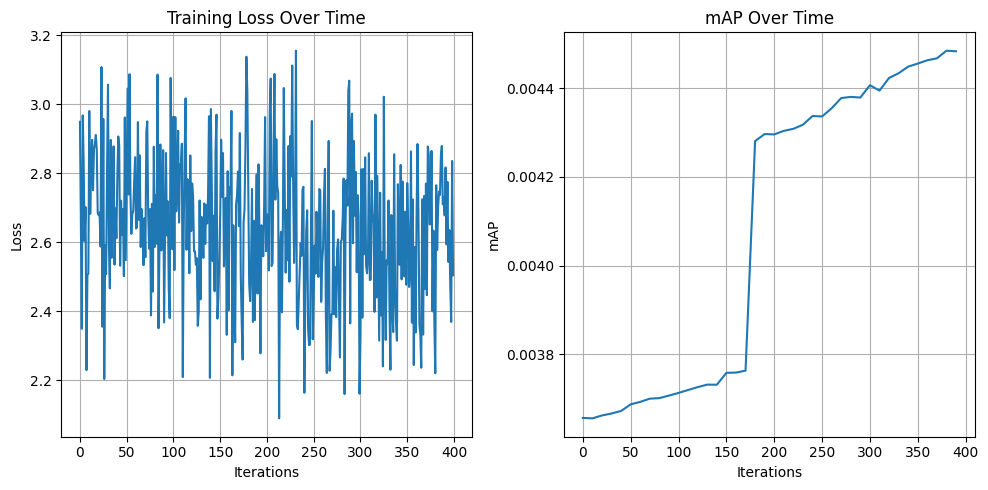

Training and evaluation completed!


In [6]:
setup_logger()

# Setup Detectron2 configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_coco",)
cfg.DATASETS.TEST = ("val_coco",)  # Add a validation set
cfg.OUTPUT_DIR = "/content/drive/My Drive/Individual_project/frcnn"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 400  # Increased for better convergence
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 4
cfg.TEST.EVAL_PERIOD = 10  # Evaluate every 100 iterations

class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

trainer = Trainer(cfg)
trainer.resume_or_load(resume=False)

loss_history = []
mAP_values = []
start_time = time.time()

with EventStorage(0) as storage:
    for iteration in range(cfg.SOLVER.MAX_ITER):
        # Training step
        data = next(iter(trainer.data_loader))
        loss_dict = trainer.model(data)
        losses = sum(loss for loss in loss_dict.values())
        trainer.optimizer.zero_grad()
        losses.backward()
        trainer.optimizer.step()

        storage.put_scalar("total_loss", losses.item())
        loss_history.append(losses.item())

        # Evaluation step
        if (iteration + 1) % cfg.TEST.EVAL_PERIOD == 0:
            # Set the model to evaluation mode
            trainer.model.eval()

            # Create a predictor
            predictor = DefaultPredictor(cfg)

            # Run inference on the validation set
            val_loader = build_detection_test_loader(cfg, cfg.DATASETS.TEST[0])
            evaluator = COCOEvaluator(cfg.DATASETS.TEST[0], cfg, False, output_dir=cfg.OUTPUT_DIR)
            results = inference_on_dataset(trainer.model, val_loader, evaluator)

            # Extract mAP
            mAP = results['bbox']['AP']
            mAP_values.append(mAP)
            print(f"Iteration {iteration + 1}, mAP: {mAP}")

            # Set the model back to training mode
            trainer.model.train()

        if iteration % 100 == 0:
            print(f"Iteration {iteration}/{cfg.SOLVER.MAX_ITER}, Loss: {losses.item()}")

# Stop the timer and calculate total time
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss Over Time")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)

# Plot mAP
plt.subplot(1, 2, 2)
plt.plot(range(0, cfg.SOLVER.MAX_ITER, cfg.TEST.EVAL_PERIOD), mAP_values)
plt.title("mAP Over Time")
plt.xlabel("Iterations")
plt.ylabel("mAP")
plt.grid(True)

plt.tight_layout()
# plt.savefig(os.path.join(cfg.OUTPUT_DIR, "training_metrics.png"))
plt.show()

print("Training and evaluation completed!")